In [972]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [973]:
SIZE = 2000

In [974]:
procedure = np.empty(SIZE+1)
posix = np.empty(SIZE+1)
openmp = np.empty(SIZE+1)
win32 = np.empty(SIZE+1)

sizes = np.arange(1000000, 1000000 + SIZE+1)

In [975]:
with open(r"logger.txt", mode="r") as file:
    while True:
        line = file.readline()
        if not line:
            break
        index = int(re.search("Array size = (.*), result of", line).group(1)) - 1000000
        ticks = float(line.split(" ")[-1])
        if "procedure" in line:
            procedure[index] = ticks
        if "posix" in line:
            posix[index] = ticks
        if "openmp" in line:
            openmp[index] = ticks

with open(r"logger_win32.txt", mode="r") as file:
    while True:
        line = file.readline()
        if not line:
            break
        index = int(re.search("Array size = (.*), result of", line).group(1)) - 1000000
        ticks = line.split(" ")[-1]
        if "win32" in line:
            win32[index] = ticks

1000000
1000005
1000006
1000008
1000009
1000012
1000014
1000015
1000016
1000018
1000020
1000021
1000024
1000026
1000028
1000029
1000030
1000032
1000034
1000040
1000041
1000044
1000046
1000048
1000049
1000050
1000051
1000052
1000054
1000055
1000060
1000061
1000062
1000063
1000064
1000065
1000066
1000067
1000070
1000071
1000074
1000081
1000083
1000084
1000085
1000090
1000092
1000093
1000097
1000102
1000103
1000106
1000107
1000108
1000109
1000110
1000111
1000112
1000115
1000120
1000121
1000123
1000126
1000128
1000129
1000132
1000135
1000138
1000140
1000141
1000142
1000143
1000148
1000149
1000151
1000155
1000156
1000157
1000158
1000161
1000162
1000164
1000165
1000167
1000168
1000169
1000171
1000172
1000180
1000181
1000182
1000183
1000185
1000187
1000188
1000192
1000193
1000194
1000197
1000199
1000200
1000203
1000204
1000205
1000206
1000207
1000208
1000210
1000213
1000214
1000215
1000216
1000220
1000221
1000225
1000227
1000228
1000229
1000230
1000231
1000232
1000233
1000234
1000235
1000236


In [976]:
print(win32[0:5])

[ 6.00000000e-003 -6.93515566e-198  5.02255692e-299 -1.40041749e-284
  2.14741315e+183]


In [977]:
#сглаживание
w = 200
def moving_average(sizes, interval, win=4):
    filt = np.ones(win)/win
    mov = win//2
    return sizes[mov:-mov], np.convolve(interval, filt, mode='same')[mov:-mov]

sizes_new, procedure = moving_average(sizes, procedure, w)
_, posix = moving_average(sizes, posix, w)
_, openmp = moving_average(sizes, openmp, w)
_, win32 = moving_average(sizes, win32, w)

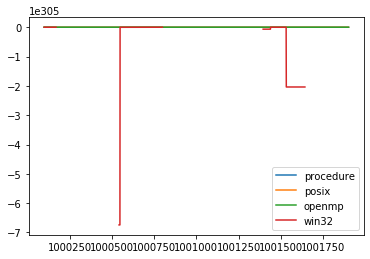

In [978]:
# plot lines with windows
plt.plot(sizes_new, procedure, label = "procedure", linestyle="-")
plt.plot(sizes_new, posix, label = "posix", linestyle="-")
plt.plot(sizes_new, openmp, label = "openmp", linestyle="-")
plt.plot(sizes_new, win32, label = "win32", linestyle="-")
plt.legend()
plt.show()